In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime
import seaborn as sns
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

### 맛집 데이터 정돈

In [2]:
# 데이터 읽어오기
matzip = pd.read_csv('data/matzipData.csv')
matzip

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
0,이나니와요스케,4.4,서울시 중구 을지로1가 192-11,02-772-9994,라멘 / 소바 / 우동,만원-2만원,주차공간없음,11:00 - 23:00,일
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
4,산수갑산,4.3,서울시 중구 인현동1가 15-4,02-2275-6654,탕 / 찌개 / 전골,만원 미만,유료주차 가능,월-금: 11:30 - 22:00 토: 11:30 - 20:00,일
...,...,...,...,...,...,...,...,...,...
395,누룩나무,4,서울시 종로구 관훈동 118-19,02-722-3398,전통 주점 / 포차,만원-2만원,주차공간없음,17:00 - 01:30,일
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,NaN
397,코블러,4,서울시 종로구 내자동 157,02-733-6421,칵테일 / 와인,만원-2만원,유료주차 가능,19:00 - 03:00,일
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,NaN


In [3]:
# 정보확인
matzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  400 non-null    object
 1   Rating           400 non-null    object
 2   Address          400 non-null    object
 3   Tel              350 non-null    object
 4   Food             400 non-null    object
 5   Price            397 non-null    object
 6   Parking          329 non-null    object
 7   Operating Time   364 non-null    object
 8   Holiday          126 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [4]:
# 결측치확인
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

In [5]:
# hoilday가 결측치인 데이터의수
a = matzip['Holiday'].isna()
matzip[a]

,Restaurant Name,Rating,Address,Tel,Food,Price,Parking,Operating Time,Holiday
1,바오차이,4.4,서울시 중구 을지로2가 203,02-6031-0107,정통 중식 / 일반 중식,2만원-3만원,유료주차 가능,11:30 - 21:30,NaN
2,라칸티나,4.4,서울시 중구 을지로1가 50,02-777-2579,이탈리안,3만원-4만원,NaN,월-토: 11:30 - 23:00 일: 17:30 - 23:00,NaN
3,라세느,4.3,서울시 중구 소공동 1,02-317-7171,뷔페,4만원 이상,발렛,06:00 - 22:00,NaN
5,양미옥,4.3,서울시 중구 을지로3가 141-2,02-2275-8838,고기 요리,2만원-3만원,유료주차 가능,11:00 - 22:00,NaN
6,커피한약방,4.1,서울시 중구 을지로2가 101-34,070-4148-4242,카페 / 디저트,만원 미만,주차공간없음,월-금: 08:00 - 22:30 토: 11:00 - 21:00 일: 12:00 -...,NaN
...,...,...,...,...,...,...,...,...,...
391,수도원,4,서울시 종로구 동숭동 50-11,02-747-1933,칵테일 / 와인,만원-2만원,유료주차 가능,18:00 - 03:00,NaN
394,산채향,4,서울시 종로구 신문로2가 1-209,02-733-1199,한정식 / 백반 / 정통 한식,만원-2만원,유료주차 가능,10:30 - 21:30,NaN
396,옴,4,서울시 종로구 신문로1가 2,02-723-4848,인도 음식,만원-2만원,주차공간없음,11:00 - 22:00,NaN
398,클류치,4,서울시 종로구 명륜3가 79-1,010-2702-1496,카페 / 디저트,만원 미만,주차공간없음,월-토: 10:00 - 23:00 일: 11:00 - 20:00,NaN


# 결측치 처리

In [6]:
matzip.isna().sum()

Restaurant Name      0
Rating               0
Address              0
Tel                 50
Food                 0
Price                3
Parking             71
Operating Time      36
Holiday            274
dtype: int64

#### 휴일에 대한 결측치 처리

In [7]:
# 휴일에 결측치가 있는 로우의 인덱스를 가져온다
a1 = matzip['Holiday'].isna()
a1
# 위에서 가져온 결과를 지정하여 결측치인 로우만 가져온다
a2 = matzip[a1]
a2.index

Int64Index([  1,   2,   3,   5,   6,   7,   8,  10,  11,  12,
            ...
            383, 385, 386, 389, 390, 391, 394, 396, 398, 399],
           dtype='int64', length=274)

In [8]:
# Holiday에 어떤값들이 저장되어 있느지 확인한다
matzip['Holiday'].value_counts()
# 휴일에 결측치가없다 == 휴일이 없다

일                     75
월                     21
토, 일                   7
화                      3
일, 첫째 월                2
일, 월                   2
둘째/넷째 일                2
수                      2
월, 화                   2
월, 일                   1
월, 마지막 화               1
격주 월                   1
토-일                    1
첫째, 셋째 월, 둘째, 넷째 일     1
토                      1
넷째 일, 월                1
첫째/셋째 일                1
월, 셋째 화                1
둘째, 넷째 일               1
Name: Holiday, dtype: int64

In [9]:
# 결측치를 연중무휴로 채워준다
matzip['Holiday'] = matzip['Holiday'].fillna('연중무휴')

In [10]:
# 결측치확인
matzip.Holiday.isna().sum()
matzip.Holiday.value_counts()

연중무휴                  274
일                      75
월                      21
토, 일                    7
화                       3
일, 첫째 월                 2
일, 월                    2
둘째/넷째 일                 2
수                       2
월, 화                    2
월, 일                    1
월, 마지막 화                1
격주 월                    1
토-일                     1
첫째, 셋째 월, 둘째, 넷째 일      1
토                       1
넷째 일, 월                 1
첫째/셋째 일                 1
월, 셋째 화                 1
둘째, 넷째 일                1
Name: Holiday, dtype: int64

### 가격에대한 결측치 처리


In [11]:
# 가격에 값이 어떻게 들어있는지 확인
matzip['Price'].value_counts()

만원-2만원     161
만원 미만      159
2만원-3만원     46
4만원 이상      22
3만원-4만원      9
Name: Price, dtype: int64

In [12]:
# 결측치확인
matzip['Price'].isna().sum()

3

In [13]:
# 결측치인 값을 그냥1만원으로 채워준다
matzip_price = matzip.Price.fillna('10000').copy()
matzip_price

0       만원-2만원
1      2만원-3만원
2      3만원-4만원
3       4만원 이상
4        만원 미만
        ...   
395     만원-2만원
396     만원-2만원
397     만원-2만원
398      만원 미만
399      만원 미만
Name: Price, Length: 400, dtype: object

In [14]:
# 저장되어 있는 값 확인
matzip_price.value_counts()
matzip_price.isna().sum()

0

In [15]:
# 값을 변경한다
# 만원이라는 글자를 10000으로 변경한다
matzip_price = matzip_price.str.replace('만원' ,'10000')
# 210000을 20000으로 변경
matzip_price = matzip_price.str.replace('210000','20000')
# 310000을 30000으로 변경
matzip_price = matzip_price.str.replace('310000','30000')
# 410000을 40000으로 변경
matzip_price = matzip_price.str.replace('410000','40000')
# 10000-를 제거한다
matzip_price = matzip_price.str.replace('10000-','')
# 20000-를 제거한다
matzip_price = matzip_price.str.replace('20000-','')
# 30000-를 제거한다
matzip_price = matzip_price.str.replace('30000-','')
# 미만을 제거한다
matzip_price = matzip_price.str.replace('미만','')
# 이상을 제거한다
matzip_price = matzip_price.str.replace('이상','')
matzip_price.value_counts()


20000     161
10000     159
30000      46
40000      22
40000       9
10000       3
Name: Price, dtype: int64

In [18]:
# 변환후 값의 타입을 확인한다
matzip_price.value_counts()

20000     161
10000     159
30000      46
40000      22
40000       9
10000       3
Name: Price, dtype: int64

In [55]:
matzip_price = matzip_price.astype('int64')
print(matzip_price.dtype)
matzip['Price'] = matzip_price
matzip['Price'].dtype

int64


dtype('int64')

### 평점

In [19]:
# 평점에 저장되어있는 값들을 확인한다
matzip['Rating'].value_counts()

-      155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.4      4
3.6      4
4.7      3
3.8      2
2.7      1
3.2      1
3.1      1
Name: Rating, dtype: int64

In [21]:
# -는 0.0으로 변환
matzip['Rating'] = matzip.Rating.str.replace('-','0.0')
matzip['Rating'].value_counts()

0.0    155
4       53
4.1     47
4.2     40
4.3     37
4.4     20
4.5      9
3.9      7
3.7      6
4.6      5
3.3      5
3.6      4
3.4      4
4.7      3
3.8      2
3.1      1
3.2      1
2.7      1
Name: Rating, dtype: int64

In [22]:
# 값들의 타입을 확인한다
matzip['Rating'].dtype

dtype('O')

In [23]:
# 실수 타입으로 변환한다
matzip['Rating'] = matzip['Rating'].astype('float')

In [24]:
# 값들의 타입을 확인한다
matzip['Rating'].dtype

dtype('float64')

### 전화번호 결측치 처리

In [25]:
# 전화번호 컬럼의 저장된 값 확인
matzip['Tel'].value_counts()

02-6388-5500     2
02-2251-8383     2
02-732-2565      1
010-2702-1496    1
02-744-1868      1
                ..
02-720-8222      1
070-8829-8020    1
02-2251-8401     1
02-777-2579      1
02-2268-1733     1
Name: Tel, Length: 348, dtype: int64

In [26]:
# 전화번호 결측치 확인
matzip['Tel'].isna().sum()

50

In [27]:
# 전화번호 결츠치를 번호없음 으로 바꾼다
matzip['Tel'] = matzip.Tel.fillna('번호없음')
matzip['Tel'].isna().sum()

0

# 주차공간 

In [28]:
# 주차공간의 결측치를 확인한다
matzip['Parking'].isna().sum()

71

In [29]:
# 주차공간에 저장되어 있는 값들을 확인한다.
matzip['Parking'].value_counts()

주차공간없음                199
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 1시간 무료          1
유료주차 가능 1.5시간 무료        1
유료주차 가능 주차권 2시간 제공      1
무료주차 가능 당일 무료           1
Name: Parking, dtype: int64

In [30]:
matzip['Parking'] = matzip['Parking'].fillna('주차공간없음')

In [33]:
matzip['Parking'].isna().sum()
# matzip['Parking'].value_counts()

0

### 영업시간 결측치 처리

In [34]:
# 결측치 확인
matzip['Operating Time'].isna().sum()

36

In [35]:
# 값 확인
matzip['Operating Time'].value_counts()

11:00 - 22:00                                                        25
11:30 - 21:30                                                        15
11:30 - 22:00                                                        15
00:00 - 24:00                                                        12
11:00 - 23:00                                                        11
                                                                     ..
화-금: 11:30 - 15:30 17:30 - 20:30 토-일: 12:00 - 15:30 18:00 - 20:30     1
07:30 - 21:00                                                         1
월-금: 08:00 - 22:00 토-일: 12:00 - 21:30                                 1
월-금: 10:00 - 22:00 토: 11:00 - 18:00                                   1
12:00 - 20:30                                                         1
Name: Operating Time, Length: 204, dtype: int64

In [38]:
a1 = matzip['Operating Time'].value_counts().index
for a2 in a1:
    print(a2)

11:00 - 22:00
11:30 - 21:30
11:30 - 22:00
00:00 - 24:00
11:00 - 23:00
11:00 - 21:00
10:00 - 22:00
12:00 - 22:00
11:00 - 21:30
11:30 - 23:00
11:30 - 21:00
12:00 - 24:00
14:00 - 02:00
10:30 - 22:00
17:00 - 01:00
11:00 - 24:00
10:00 - 23:00
09:00 - 22:00
10:00 - 22:30
12:00 - 22:30
10:30 - 21:30
12:00 - 20:00
08:00 - 23:00
17:00 - 03:00
10:00 - 21:00
09:30 - 22:00
11:00 - 23:30
11:00 - 20:30
12:00 - 21:30
11:30 - 24:00
18:00 - 03:00
09:00 - 23:00
12:00 - 19:00
월-금: 11:00 - 23:00 토-일: 11:00 - 22:00
12:00 - 23:00
10:30 - 22:30
10:00 - 24:00
08:00 - 20:00
16:00 - 01:00
08:00 - 22:00
11:00 - 18:00
월-금: 11:00 - 22:00 토: 11:00 - 21:00
월-금: 07:00 - 23:00 토: 08:00 - 22:00 일: 08:00 - 20:00
월-금: 11:30 - 22:00 토-일: 12:00 - 22:00
11:00 - 20:00
17:00 - 01:30
월-금: 11:30 - 22:00 토-일: 11:30 - 21:30
월-금: 11:30 - 22:00 토: 11:30 - 15:00
08:30 - 22:00
화-목: 14:00 - 22:00 금-토: 12:00 - 24:00 일: 13:00 - 20:00
17:00 - 05:00
월-금: 07:00 - 21:00 토-일: 12:00 - 20:00
16:00 - 23:00
17:00 - 23:00
10:30 - 23:30
월-금: 12:00

In [39]:
# 결측치를 00:00 ` 24:00으로 채워준다
matzip['Operating Time'] = matzip['Operating Time'].fillna('00:00 - 24:00')
matzip['Operating Time'].isna().sum()

0

## 데이터분석

### 가격에따른 평점

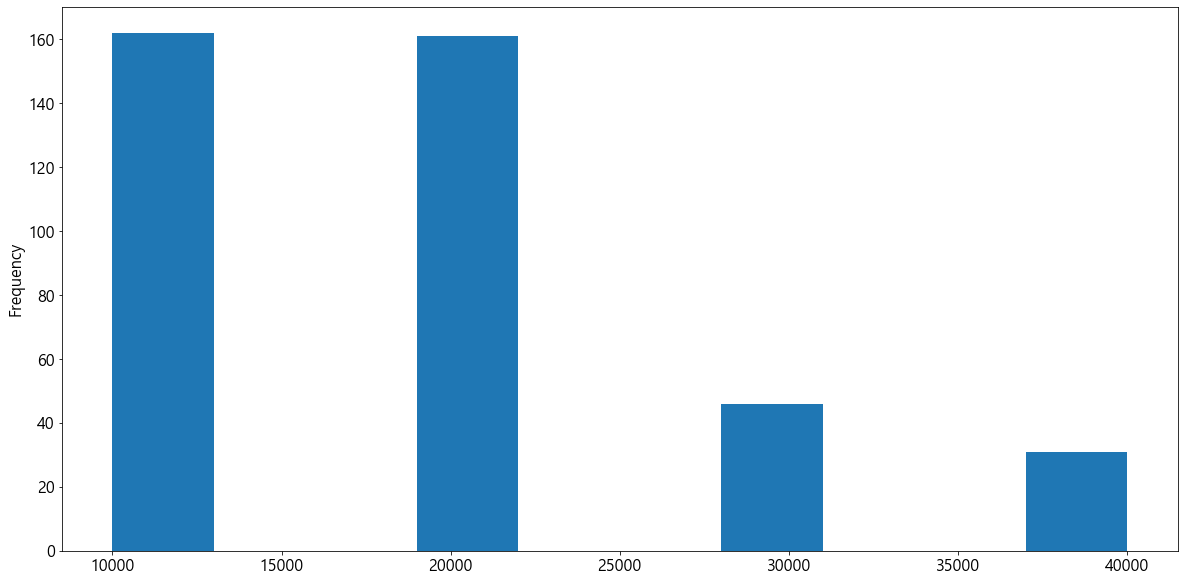

In [57]:
# 가격 분포확인
matzip['Price'].plot.hist()
plt.show()

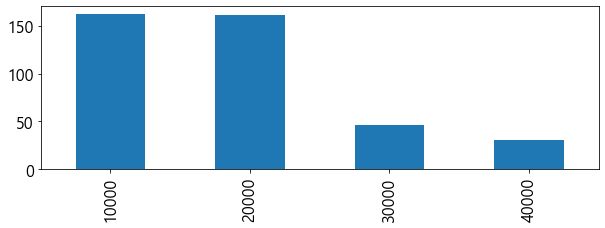

In [62]:
matzip['Price'].value_counts().plot.bar(figsize = (10,3))
plt.show()

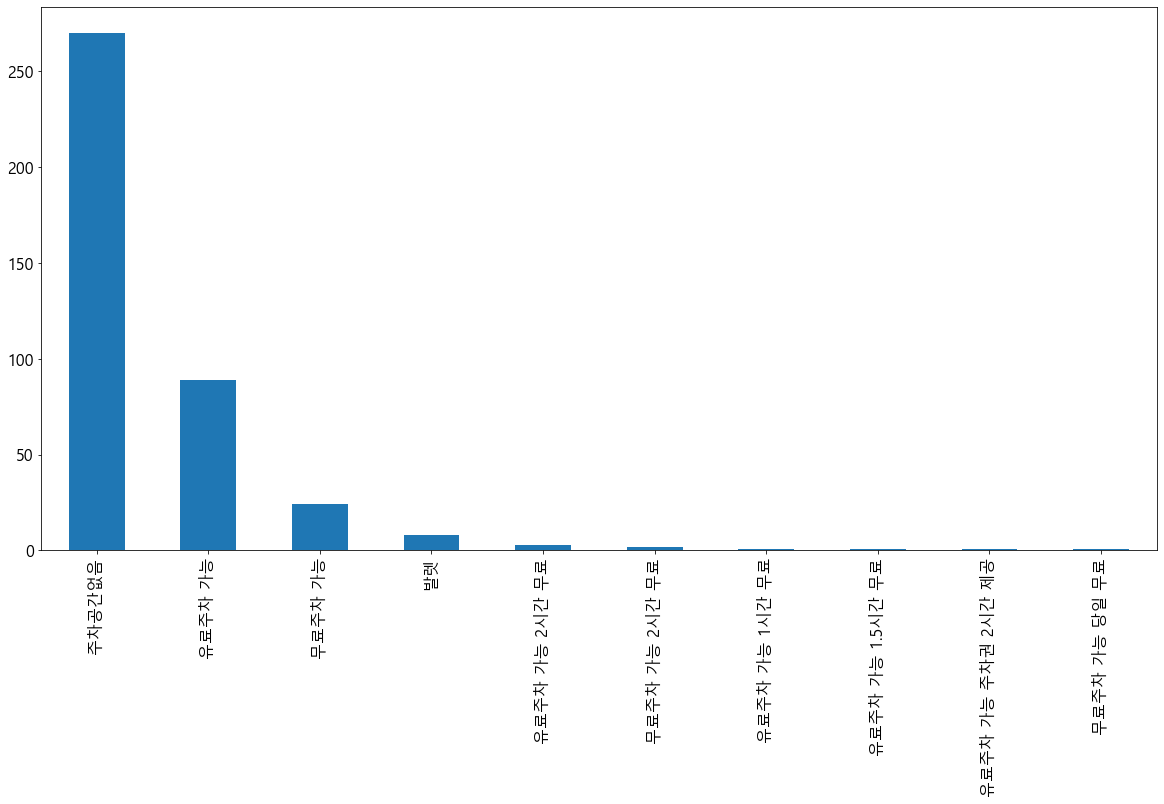

In [61]:
# 주차관련 분포확인
# 주차 관련 정보는 숫자가 아니기 때문에 오류가 발생한다
# 히스토 그램 불가능
matzip['Parking'].value_counts().plot.bar()
plt.show()

### 가격과 주차공간에 따른 별점확인

In [63]:
# 가격에 저장되어있는 데이터 확인
matzip['Price'].value_counts()

10000    162
20000    161
30000     46
40000     31
Name: Price, dtype: int64

10000원 평균 평점 : 2.6


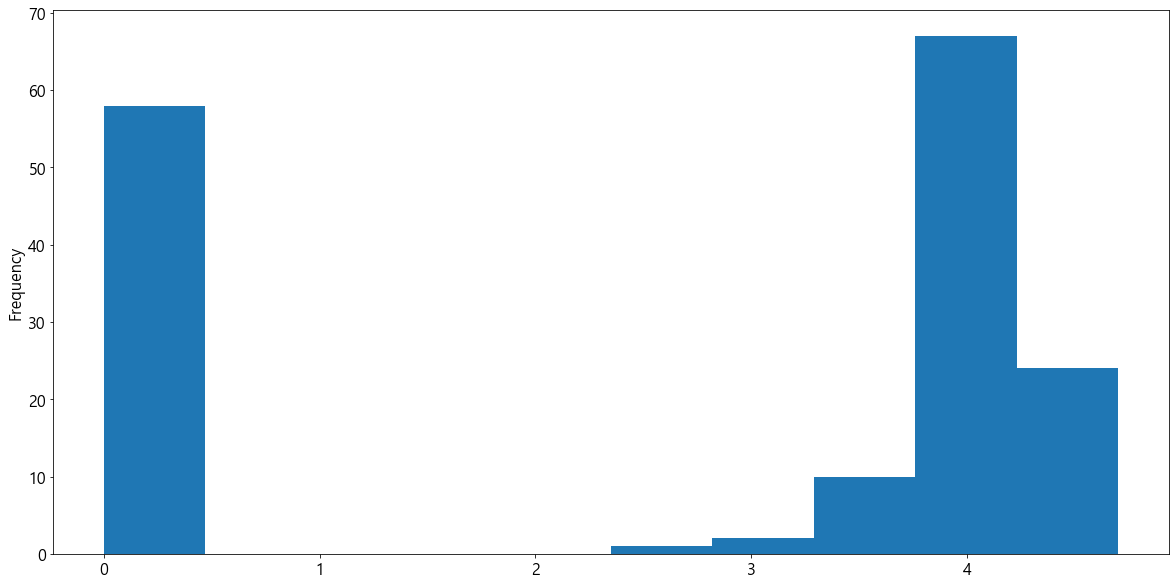

20000원 평균 평점 : 2.39


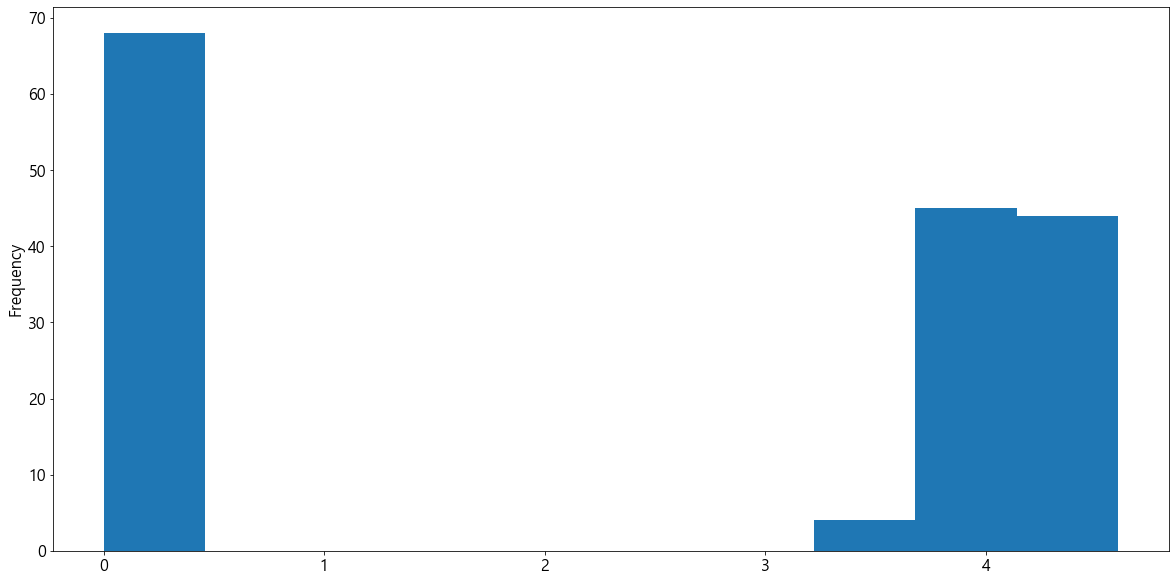

30000원 평균 평점 : 2.34


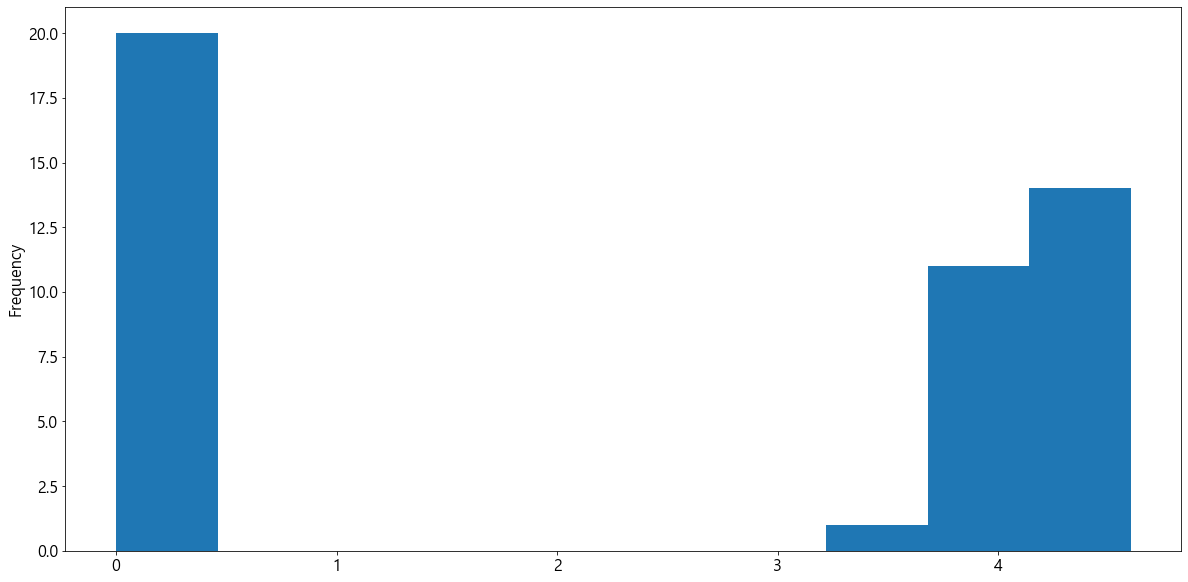

40000원 평균 평점 : 3.03


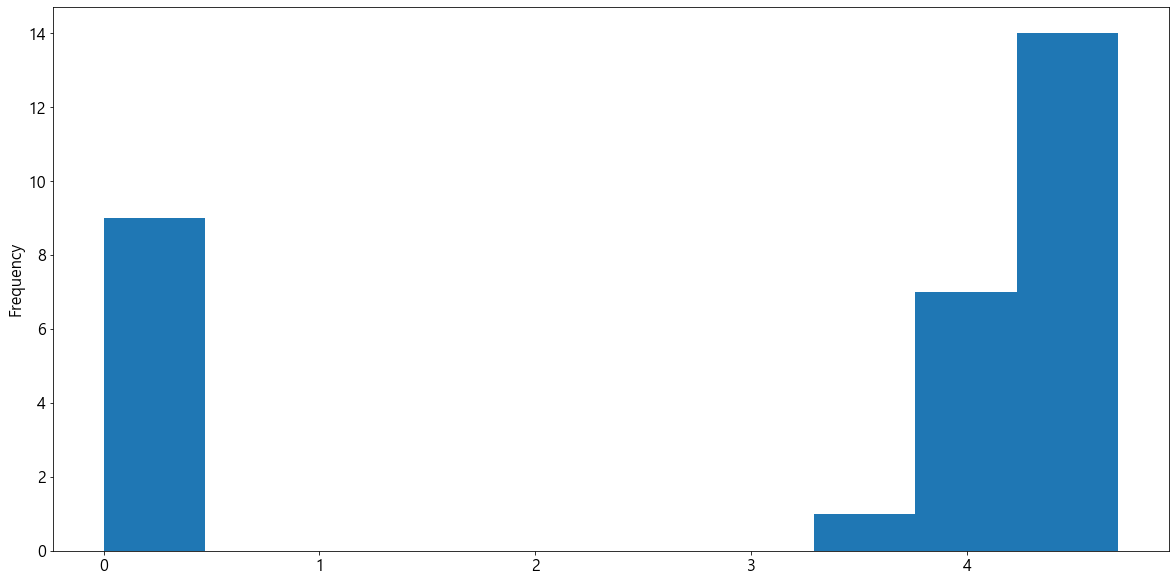

In [75]:
# price 컬럼에 저장되어있는 값들을 추출
a1 = matzip['Price'].value_counts().index
for a2 in a1:
    b1 = matzip.query(f'Price == {a2}').index
    rating = matzip.loc[b1]['Rating']
#     print(rating)
    # 평점 평균
    rating_avg = rating.mean()
    print(f'{a2}원 평균 평점 : {round(rating_avg,2)}')
    rating.plot.hist()
    plt.show()

In [76]:
# Parking에 저장되어있는 데이터 종류 확인
matzip.Parking.value_counts()

주차공간없음                270
유료주차 가능                89
무료주차 가능                24
발렛                      8
유료주차 가능 2시간 무료          3
무료주차 가능 2시간 무료          2
유료주차 가능 1시간 무료          1
유료주차 가능 1.5시간 무료        1
유료주차 가능 주차권 2시간 제공      1
무료주차 가능 당일 무료           1
Name: Parking, dtype: int64

In [79]:
a1 = matzip['Parking'].value_counts().index
a1

Index(['주차공간없음', '유료주차 가능', '무료주차 가능', '발렛', '유료주차 가능 2시간 무료',
       '무료주차 가능 2시간 무료', '유료주차 가능 1시간 무료', '유료주차 가능 1.5시간 무료',
       '유료주차 가능 주차권 2시간 제공', '무료주차 가능 당일 무료'],
      dtype='object')

주차공간없음:2.28


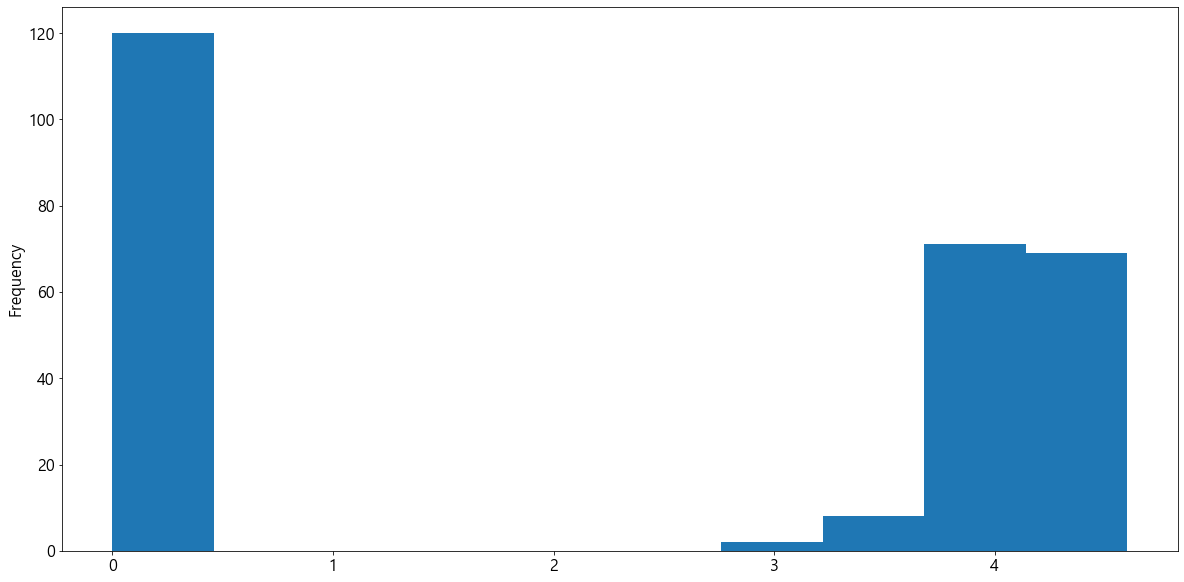

유료주차 가능:2.8


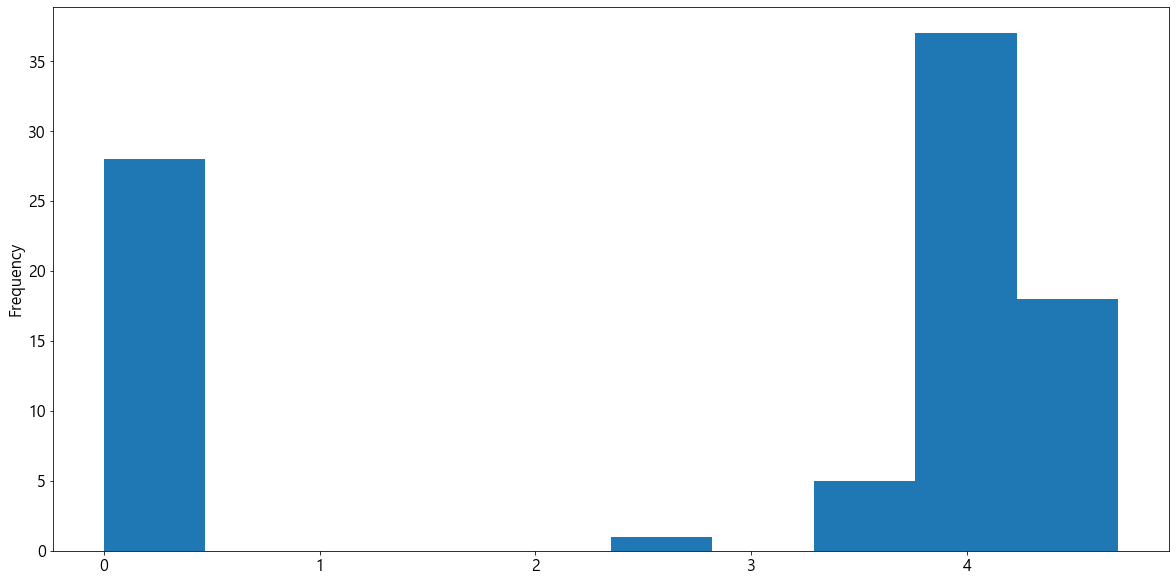

무료주차 가능:3.3


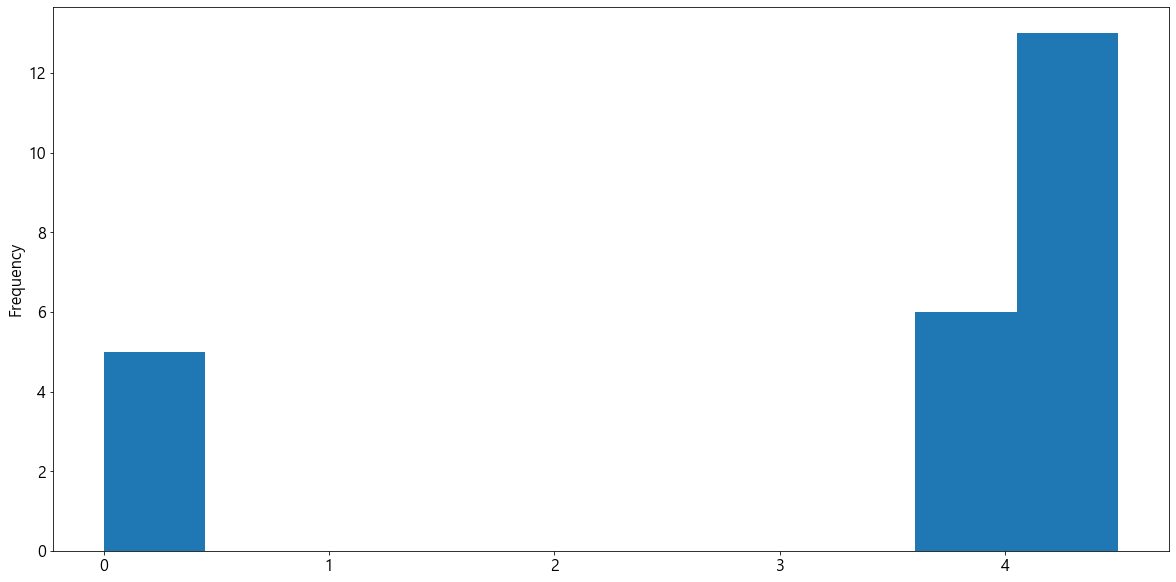

발렛:4.19


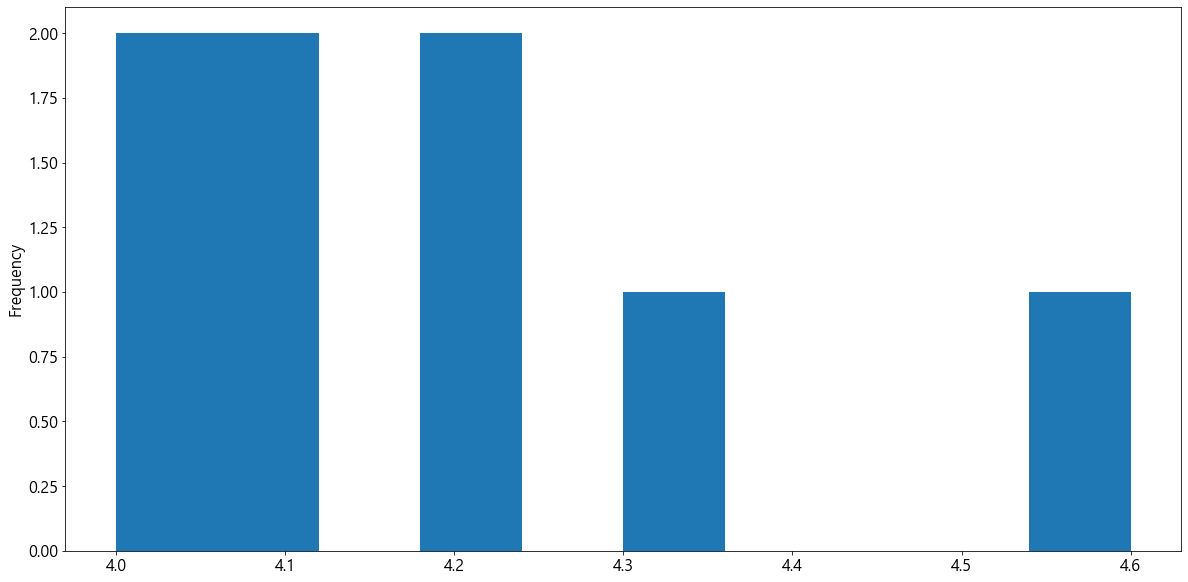

유료주차 가능 2시간 무료:4.07


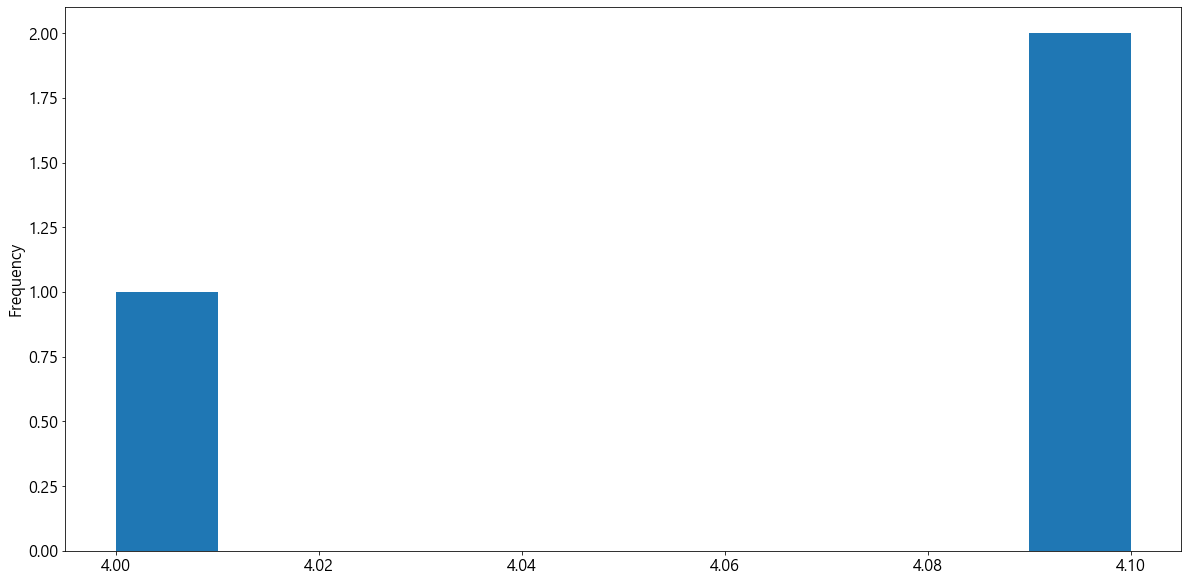

무료주차 가능 2시간 무료:2.35


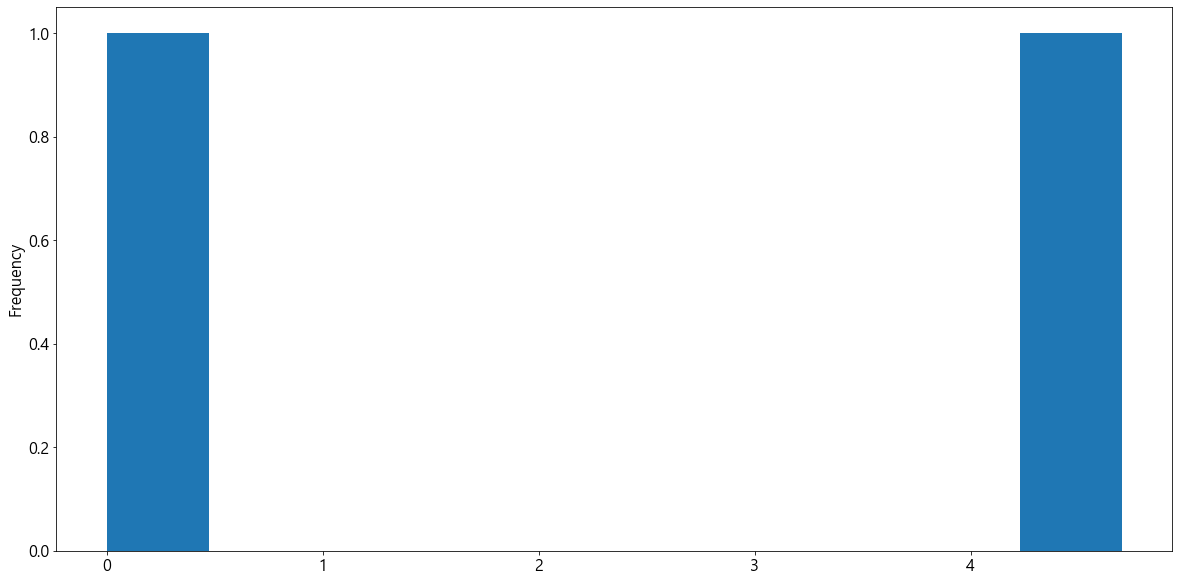

유료주차 가능 1시간 무료:4.4


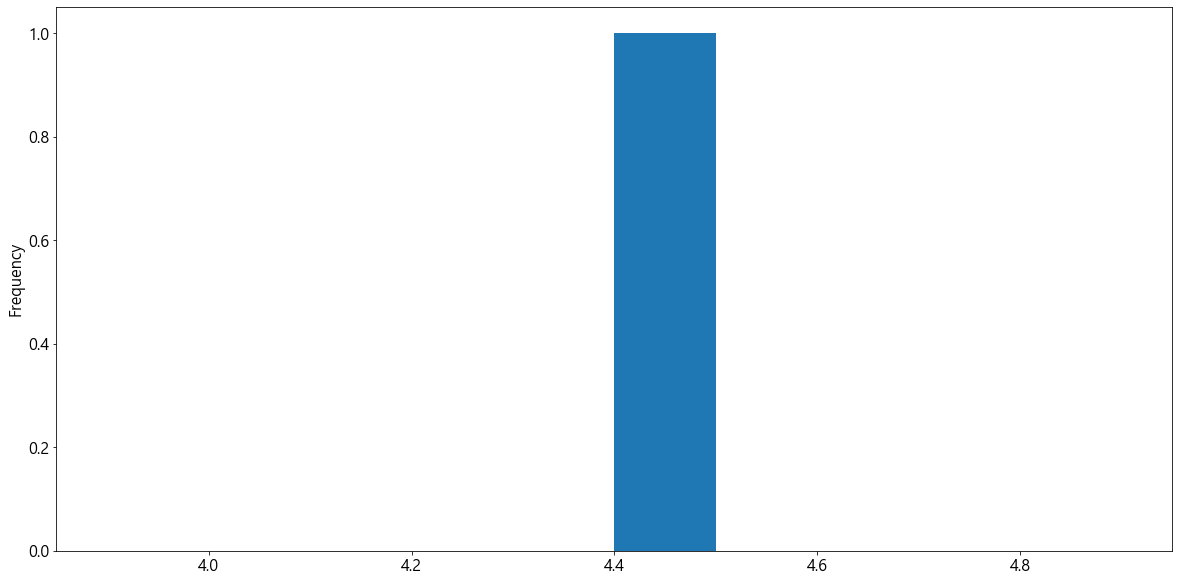

유료주차 가능 1.5시간 무료:4.4


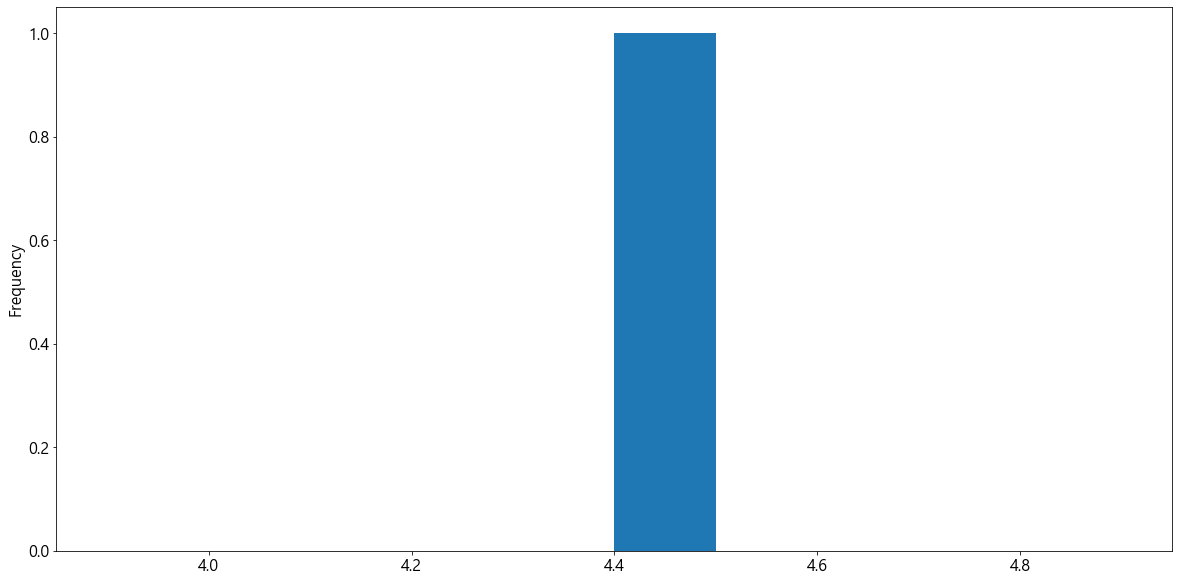

유료주차 가능 주차권 2시간 제공:4.1


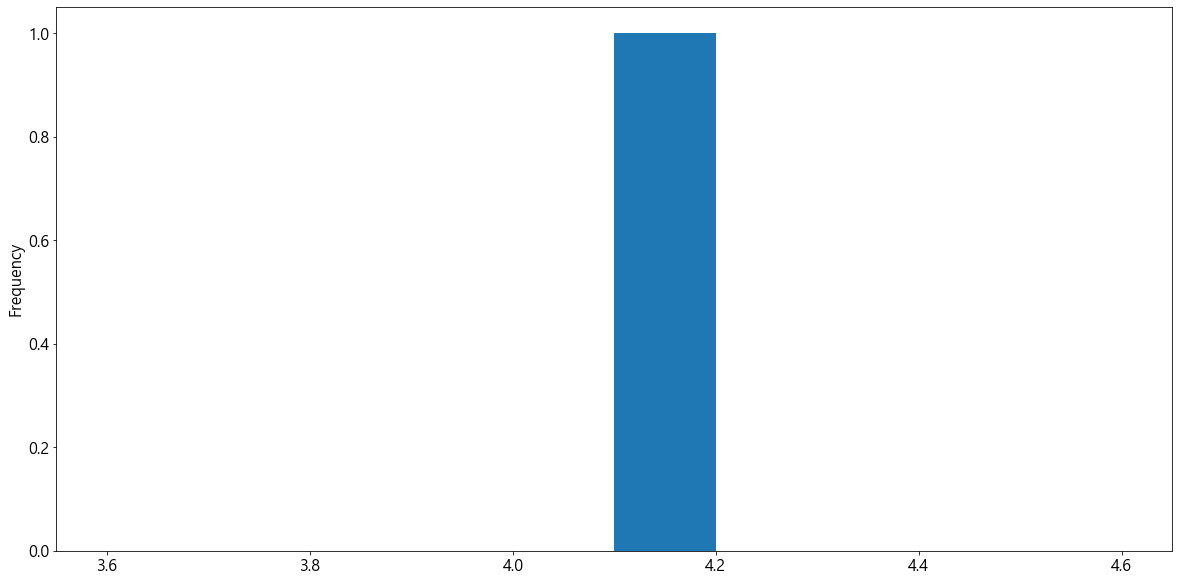

무료주차 가능 당일 무료:0.0


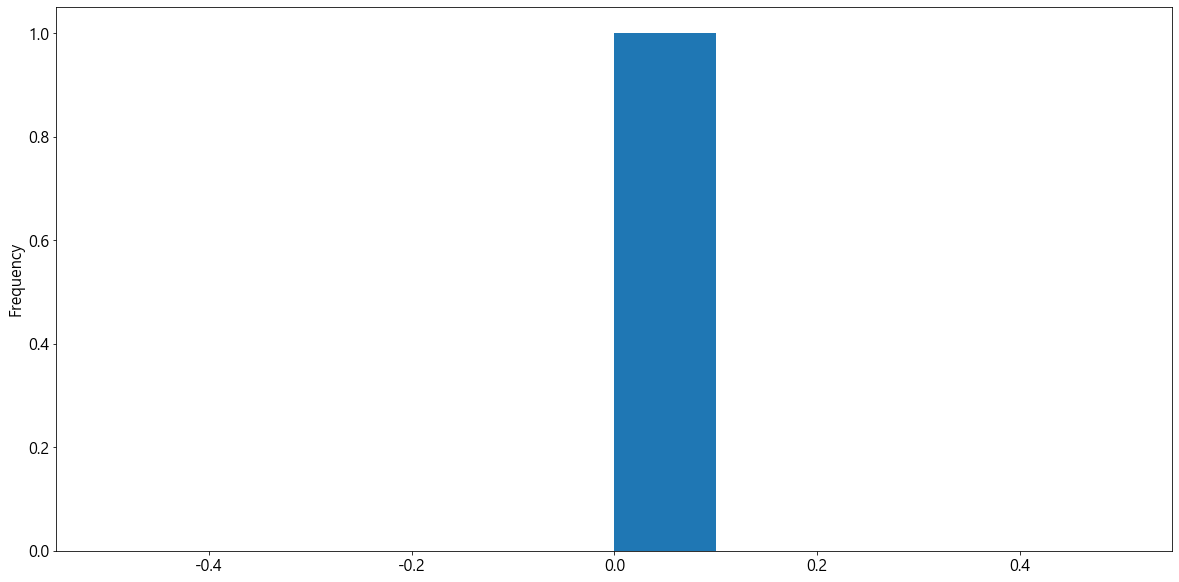

In [90]:
# parking 컬럼에 저장되어있는 값들을 추출
a1 = matzip['Parking'].value_counts().index
for value in a1:
    # 각 값에 해당하는 로우의 인덱스를 가져온다
    idx = matzip.query(f'Parking == "{value}"').index
    # print(idx)
    # 각 값 별 평점 데이터를 가져온다
    rating = matzip.loc[idx]['Rating']
    # print(rating.mean())
    # 평점 평균을 구한다
    rating_avg = rating.mean()
    print(f'{value}:{round(rating_avg,2)}')
    rating.plot.hist()
    plt.show()
